In [109]:
import pandas as pd
# import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np



(0, 100)

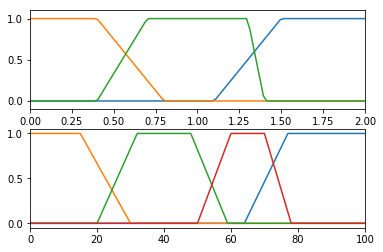

In [110]:
def hl(l,r,ek):
    if ek<=l:
        return 0
    elif ek>r:
        return 1
    return (ek-l)/(r-l)
def ll(l,r,ek):
    if ek<=l:
        return 1
    elif ek>r:
        return 0
    return 1-((ek-l)/(r-l))
def rg(l1,l2,r1,r2,ek):
    if ek<=l1 or ek>r2:
        return 0
    elif ek>l1 and ek<=l2:
        return (ek-l1)/(l2-l1)
    elif ek>l2 and ek<=r1:
        return 1
    elif ek>r1 and ek<=r2:
        return (r2-ek)/(r2-r1)
    return 0

phr=1.5
phl=1.1
plr=0.8
pll=0.4
pal1=0.4
pal2=0.7
par1=1.3
par2=1.4

hlr=30
hll=15

hal1=20
hal2=32
har1=48
har2=59

h2al1=50
h2al2=60
h2ar1=70
h2ar2=78

hhr=77
hhl=64

fig, axes = plt.subplots(nrows=2, sharex=False)
x = np.linspace(0, 2, 100)
axes[0].plot(x, [hl(phl,phr,xx) for xx in x])
axes[0].plot(x, [ll(pll,plr,xx) for xx in x])
axes[0].plot(x, [rg(pal1,pal2,par1,par2,xx) for xx in x])
axes[0].set_xlim(0, 2)
axes[0].set_ylim(-0.1, 1.1)

print()
x2 = np.linspace(0, 100, 500)
axes[1].plot(x2, [hl(hhl,hhr,xx) for xx in x2])
axes[1].plot(x2, [ll(hll,hlr,xx) for xx in x2])
axes[1].plot(x2, [rg(hal1,hal2,har1,har2,xx) for xx in x2])
axes[1].plot(x2, [rg(h2al1,h2al2,h2ar1,h2ar2,xx) for xx in x2])
axes[1].set_xlim(0, 100)


In [111]:
score=[]
acr=[]
i=0
while i<len(pend):
    score.append([
        {'label':'considered','score':min(hl(phl,phr,pend[i]),hl(hhl,hhr,hut[i]))},
        {'label':'rejected','score':min(hl(phl,phr,pend[i]),rg(hal1,hal2,har1,har2,hut[i]))},
        {'label':'rejected','score':min(hl(phl,phr,pend[i]),rg(h2al1,h2al2,h2ar1,h2ar2,hut[i]))},
        {'label':'rejected','score':min(hl(phl,phr,pend[i]),ll(hll,hlr,hut[i]))},
        
        {'label':'accepted','score':min(rg(pal1,pal2,par1,par2,pend[i]),hl(hhl,hhr,hut[i]))},
        {'label':'considered','score':min(rg(pal1,pal2,par1,par2,pend[i]),rg(hal1,hal2,har1,har2,hut[i]))},
        {'label':'accepted','score':min(rg(pal1,pal2,par1,par2,pend[i]),rg(h2al1,h2al2,h2ar1,h2ar2,hut[i]))},
        {'label':'rejected','score':min(rg(pal1,pal2,par1,par2,pend[i]),ll(hll,hlr,hut[i]))},
        
        {'label':'accepted','score':min(ll(pll,plr,pend[i]),hl(hhl,hhr,hut[i]))},
        {'label':'accepted','score':min(ll(pll,plr,pend[i]),rg(hal1,hal2,har1,har2,hut[i]))},
        {'label':'considered','score':min(ll(pll,plr,pend[i]),rg(h2al1,h2al2,h2ar1,h2ar2,hut[i]))},
        {'label':'considered','score':min(ll(pll,plr,pend[i]),ll(hll,hlr,hut[i]))},
    ])
    i+=1
# print(score)

In [112]:
i=0
while i<len(pend):
    cons=[]
    acc=[]
    rej=[]
    j=0
    while j<len(score[i]):
        if score[i][j]['label']=='considered':
            cons.append(score[i][j]['score'])
        elif score[i][j]['label']=='accepted':
            acc.append(score[i][j]['score'])
        elif score[i][j]['label']=='rejected':
            rej.append(score[i][j]['score'])
        j+=1
    acr.append({'considered':max(cons),'accepted':max(acc),'rejected':max(rej)})
    i+=1
# print(acr)

In [117]:
import operator
def deff(r, c, a):
    return ((r * 30) + (c * 50) + (a * 80))/(r+c+a)
results=[]
result=[]
resrej=[]
i=0
while i<len(acr):
    results.append({'index':i+1,'score':deff(acr[i]['rejected'],acr[i]['considered'],acr[i]['accepted'])})
    i+=1
for foo in sorted(results, key=operator.itemgetter("score"),reverse=True):
    result.append(foo)
i=0
while i<len(result):
    if(i>=20):
        resrej.append(result[i]['index']-1)
    i+=1

[52, 87, 92, 58, 63, 18, 17, 79, 34, 56, 38, 94, 88, 59, 31, 42, 13, 75, 1, 12, 32, 47, 72, 82, 95, 69, 67, 37, 99, 57, 55, 39, 9, 16, 41, 64, 26, 15, 84, 3, 27, 66, 96, 30, 74, 50, 78, 53, 90, 0, 4, 6, 7, 10, 11, 19, 24, 25, 28, 29, 36, 44, 45, 49, 51, 54, 62, 68, 70, 71, 77, 80, 83, 85, 86, 89, 93, 98, 81, 97]


    No   Pendapatan   Hutang
2    3        1.273   80.701
5    6        0.664   63.226
8    9        0.806   69.192
14  15        0.428   38.739
20  21        0.155   29.496
21  22        0.828   56.747
22  23        0.112   26.202
23  24        0.819   60.764
33  34        0.515   41.771
35  36        0.946   98.000
40  41        1.159   68.120
43  44        0.902   68.021
46  47        0.780   78.054
48  49        0.516   43.660
60  61        0.880   79.878
61  62        1.159   87.871
65  66        0.666   60.245
73  74        0.600   80.864
76  77        1.217   82.991
91  92        0.817   62.427


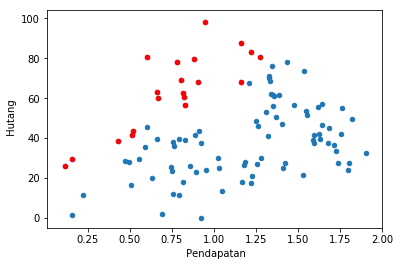

In [118]:
df=pd.read_csv("DataTugas2.csv")
df2=df
df2=df2.drop(df2.index[resrej])
print(df2)
# ax2 = df2.plot.scatter(x=' Pendapatan',y=' Hutang')
ax1 = df.plot.scatter(x=' Pendapatan',y=' Hutang')
df2.plot.scatter(x=' Pendapatan',y=' Hutang',ax=ax1,color='#ff0000')

In [95]:
# df2=df
# df2=df2.drop(df2.index[listtodrop])
# print(df)
# print(df2)

In [96]:
df3=df
# df3['gaji/utang'] = np.where(df['Name']=='Person1',df['State'].map(state_map),df['State'].map(state_map2))
# df['data'].apply(lambda x: 'true' if x <= 2.5 else 'false')
df3['rat'] = df.apply(lambda row: row[' Pendapatan']/row[' Hutang'] if row[' Hutang']>0 else row[' Pendapatan'], axis=1)
df3=df3.sort_values(by=['rat'], ascending=True)
print(df3)
# for index, row in df3.iterrows():
#     print(row.to_frame().T)

for i,k in enumerate(newlist):
    if(i<20):
        print(k)

     No   Pendapatan   Hutang       rat
22   23        0.112   26.202  0.004274
20   21        0.155   29.496  0.005255
73   74        0.600   80.864  0.007420
35   36        0.946   98.000  0.009653
46   47        0.780   78.054  0.009993
5     6        0.664   63.226  0.010502
60   61        0.880   79.878  0.011017
14   15        0.428   38.739  0.011048
65   66        0.666   60.245  0.011055
8     9        0.806   69.192  0.011649
48   49        0.516   43.660  0.011819
33   34        0.515   41.771  0.012329
91   92        0.817   62.427  0.013087
18   19        0.599   45.566  0.013146
61   62        1.159   87.871  0.013190
43   44        0.902   68.021  0.013261
23   24        0.819   60.764  0.013478
21   22        0.828   56.747  0.014591
76   77        1.217   82.991  0.014664
2     3        1.273   80.701  0.015774
52   53        0.473   28.740  0.016458
63   64        0.588   35.480  0.016573
79   80        0.664   39.692  0.016729
40   41        1.159   68.120  0.017014


52
63
79
40
17
58
87
47
94
92
34
82
38
75
88
95
3
1
59
12
56
42
13
66
31
67
32
55
93
27
39
83
10
11
37
51
97
41
30
57
19
15
16
69
71
49
28
86
54
74
96
89
84
0
36
99
4
64
6
9
98
26
45
24
62
25
77
78
44
53
80
81
68
90
85
29
70
72
50
7
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
    No   Pendapatan   Hutang       rat
22  23        0.112   26.202  0.004274
20  21        0.155   29.496  0.005255
73  74        0.600   80.864  0.007420
35  36        0.946   98.000  0.009653
46  47        0.780   78.054  0.009993
5    6        0.664   63.226  0.010502
60  61        0.880   79.878  0.011017
14  15        0.428   38.739  0.011048
65  66        0.666   60.245  0.011055
8    9        0.806   69.192  0.011649
48  49        0.5

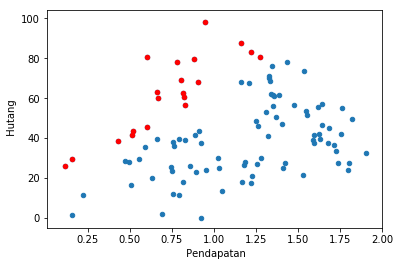

In [97]:
resreal=[]
i=0
for index, row in df3.iterrows():
    
    if(i>=20):
        print(index)
        resreal.append(i)
#         resreal.append(index)
    i+=1
print(resreal)
df4=df3
df4=df4.drop(df4.index[resreal])
ax3 = df.plot.scatter(x=' Pendapatan',y=' Hutang')
df4.plot.scatter(x=' Pendapatan',y=' Hutang',ax=ax3,color='#ff0000')
print(df4)